In [1]:
import latentvelo as ltv
import numpy as np
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import anndata as ad

SEED = 2024
np.random.seed(SEED)

Global seed set to 0


In [2]:
adata = sc.read_h5ad("scNT_HSC_scvelo_process.h5ad")
print(adata)

AnnData object with n_obs × n_vars = 1947 × 2000
    obs: 'batch', 'cell_type', 'time', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'ntr', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'gene_name_mapping', 'query', 'scopes', '_id', '_score', 'symbol', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'PCs', 'batch_colors', 'cell_type_colors', 'dynamics', 'explained_variance_ratio_', 'feature_selection', 'genes_to_use', 'grid_velocity_umap', 'neighbors', 'pca_mean', 'pp', 'velocyto_SVR'
    obsm: 'X_pca', 'X_umap', 'scNT_velocity_umap', 'velocity_umap'
    layers: 'M_n', 'M_nn', 'M_s', 'M_ss', 'M_t', 'M_tn', 'M_tt', 'M_u', 'M_us', 'M_uu',

In [3]:
# adata = ltv.utils.standard_clean_recipe(adata,normalize_library = False)
adata = ltv.utils.standard_clean_recipe(adata)
adata.var['velocity_genes'] = True

spliced_key = 'spliced'
unspliced_key = 'unspliced'

spliced_library_sizes = adata.layers[spliced_key].sum(1)
unspliced_library_sizes = adata.layers[unspliced_key].sum(1)

if len(spliced_library_sizes.shape) == 1:
       spliced_library_sizes = spliced_library_sizes[:,None]
if len(unspliced_library_sizes.shape) == 1:
       unspliced_library_sizes = unspliced_library_sizes[:,None]

adata.obs['spliced_size_factor'] = spliced_library_sizes #spliced_all_size_factors
adata.obs['unspliced_size_factor'] = unspliced_library_sizes #unspliced_all_size_factors

model = ltv.models.VAE(observed = 2000) # observed: number of genes
epochs, val_ae, val_traj = ltv.train(model, adata,name="scNT")


Extracted 2000 highly variable genes.
Choosing top 2000 genes
computing neighbors
    finished (0:00:06) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Warning, folder already exists. This may overwrite a previous fit.
2000 velocity genes used
epoch 0, full loss 116.027, val loss 72.079, recon MSE 0.519, traj MSE 0.305, reg loss -1.840
epoch 1, full loss 106.520, val loss 44.403, recon MSE 0.290, traj MSE 0.197, reg loss -2.211
epoch 2, full loss 84.445, val loss 40.609, recon MSE 0.237, traj MSE 0.157, reg loss -2.463
epoch 3, full loss 72.954, val loss 36.720, recon MSE 0.272, traj MSE 0.144, reg loss -2.774
epoch 4, full loss 67.001, val loss 33.099, recon MSE 0.241, traj MSE 0.140, reg loss -3.002
epoch 5, full loss 60.095, val loss 29.002, recon MSE 0.233, traj MSE 0.138, reg loss -3.206
epoch 6, f

In [4]:
latent_adata, adata = ltv.output_results(model, adata, gene_velocity=True,
                                         embedding='umap')


In [5]:
print(adata)
print(latent_adata)

AnnData object with n_obs × n_vars = 1947 × 2000
    obs: 'batch', 'cell_type', 'time', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'ntr', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'spliced_size_factor', 'unspliced_size_factor', 'batch_id', 'celltype_id', 'root', 'terminal', 'latent_time'
    var: 'gene_name_mapping', 'query', 'scopes', '_id', '_score', 'symbol', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_genes', 'R2', 'R2_traj', 'R2_test', 'R2_traj_test'
    uns: 'PCs', 'batch_colors', 'cell_type_colors', 'dynamics', 'explained_variance_ratio_', 'feature_selection', 'genes_to_use', 'grid_velocity_umap', 'neighbors', 'pca_mean', 'pp

        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)
or disable the progress bar using `show_progress_bar=False`.


Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0


    finished (0:00:08) --> added 
    'velo_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velo_umap', embedded velocity vectors (adata.obsm)
saving figure to file Figure/stream/latentvelo.svg


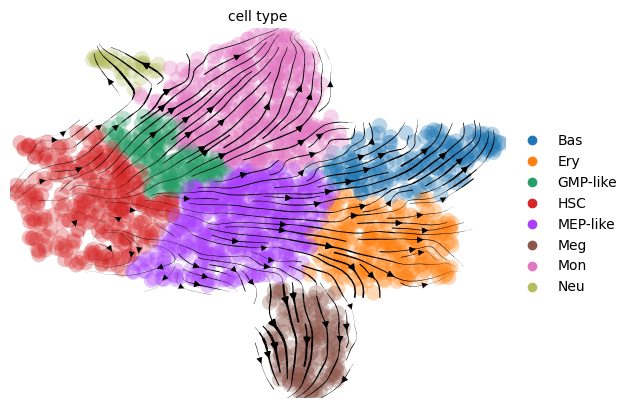

In [6]:
scv.tl.velocity_graph(adata,vkey="velo",n_jobs=10,basis= "umap")
scv.pl.velocity_embedding_stream(adata,basis= "umap",color="cell_type",
                                 vkey="velo",
                                 palette = sc.pl.palettes.default_20,
                                 legend_loc = 'right margin',
                                 save="Figure/stream/" + "latentvelo.svg" )

In [8]:
adata.write_h5ad("adata/LatentVelo.h5ad")